# Comparison of various Dimensionality Reduction Techniques in Python
Nowadays,  most datasets have a large number of variables. In other words, they have a high number of dimensions along which the data is distributed. Visually exploring the data can then become challenging and most of the time even practically impossible to do manually.

Dimensionality reduction is the process of reducing the total number of features in our feature set using strategies like feature selection or feature extraction.

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets

from sklearn.decomposition import (PCA, IncrementalPCA,
                                   KernelPCA, TruncatedSVD,
                                   FastICA, MiniBatchDictionaryLearning,
                                   SparsePCA)

from sklearn.manifold import (Isomap,
                              LocallyLinearEmbedding)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.random_projection import (GaussianRandomProjection,
                                       SparseRandomProjection)

from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

## Load the dataset, define the initial parameters and split the train/test set

In [ ]:
# Load Digits dataset
digits = datasets.load_digits()
X, y = digits.data, digits.target

# Parameters
dim = len(X[0])
n_classes = len(np.unique(y))
n_neighbors = 3
random_state = 0

# Split into train/test
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.5, stratify=y,
                     random_state=random_state)

## Define the dimensionality reduction algorithms to be used

Let's use 2 dimensions, so we can create a chart later

**Pipeline:** In each of the technique, we'll be creating a pipeline (using make_pipeline of sklearn) in which data will be scaled (using StandardScaler) before passing to the dimensionality reduction method.

### PCA

**Principal component analysis** is a statistical method that uses the process of linear, orthogonal transformation to transform a higher-dimensional set of features that could be possibly correlated into a lower-dimensional set of linearly uncorrelated features. These transformed and newly created features are also known as Principal Components or PCs. In any PCA transformation, the total number of PCs is always less than or equal to the initial number of features. The first principal component tries to capture the maximum variance of the original set of features.

In [ ]:
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=2,
                        random_state=random_state))

### Incremental PCA

The **incremental principal component analysis** is a variant of the PCA It only keeps the most significant singular vectors to project the data into a space to
reduced size.

In [ ]:
inc_pca = make_pipeline(StandardScaler(),
                        IncrementalPCA(n_components=2))

### Kernel PCA

KPCA makes it possible to perform complex nonlinear projections for dimensionality reduction.

In [ ]:
# kernel : “linear” | “poly” | “rbf” | “sigmoid” | “cosine” | “precomputed”
kpca = make_pipeline(StandardScaler(),
                     KernelPCA(kernel="cosine", # Kernel used for PCA
                               n_components=2, # Number of components
                               gamma=None, # Kernel coefficient for rbf, poly and sigmoid kernels
                               fit_inverse_transform=True,
                               random_state=random_state, # Pass an int for reproducible results
                               n_jobs=1)) # The number of parallel jobs to run. -1 means using all processors.

### Sparse PCA

**Sparse PCA** uses the links between the ACP and the SVD to extract the main components by solving a lower-order matrix approximation problem.

In [ ]:
sparsepca = make_pipeline(StandardScaler(),
                          SparsePCA(n_components=2, # Number of sparse atoms to extract.
                                    alpha=0.0001, # Sparsity controlling parameter. Higher values lead to sparser components.
                                    random_state=random_state, # Pass an int for reproducible results
                                    n_jobs=-1)) # The number of parallel jobs to run. -1 means using all processors.

### Singular Value Decomposition

**SVD** can be applied even on rectangular matrices; whereas, eigenvalues are defined only for square matrices. The equivalent of eigenvalues obtained through the SVD method are called singular values, and vectors obtained equivalent to eigenvectors are known as singular vectors. However, as they are rectangular in nature, we need to have left singular vectors and right singular vectors respectively for their dimensions.

In [ ]:
SVD = make_pipeline(StandardScaler(),
                    TruncatedSVD(n_components=2, # Desired dimensionality of output data.
                                 #Must be strictly less than the number of features.
                                 # The default value is useful for visualisation.

                                 algorithm='randomized', # SVD solver to use.
                                 random_state=random_state, # Pass an int for reproducible results
                                 n_iter=5)) # The number of parallel jobs to run. -1 means using all processors.

### Gaussian Random Projection

In the random projection, data with a very large dimension (d) are projected
in a two-dimensional space (kd) with a random matrix.

In [ ]:
GRP = make_pipeline(StandardScaler(),
                    GaussianRandomProjection(n_components=2, # Dimensionality of the target projection space.
                                             eps = 0.5, # Parameter to control the quality of the embedding.
                                             # Smaller values lead to better embedding and higher number of dimensions (n_components) in the target projection space.
                                             random_state=random_state))

### Linear Discriminant Analysis

**LDA** is a classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.

In [ ]:
lda = make_pipeline(StandardScaler(),
                    LinearDiscriminantAnalysis(n_components=2))
                    # Number of components (<= min(n_classes - 1, n_features)) for dimensionality reduction.

### Neighborhood Components Analysis

**Neighborhood Component Analysis (NCA)** is a machine learning algorithm for metric learning. It learns a linear transformation in a supervised fashion to improve the classification accuracy of a stochastic nearest neighbors rule in the transformed space.

In [ ]:
nca = make_pipeline(StandardScaler(),
                    NeighborhoodComponentsAnalysis(n_components=2, # Preferred dimensionality of the projected space. If None it will be set to n_features.
                                                   random_state=random_state))

### Sparse Random Projection

The fragmented random matrix is an alternative to the dense random projection matrix with traditional methods of dimension reduction. It ensures similar embedding quality while maximizing memory efficiency and allowing faster calculation of projected data.

In [ ]:
SRP = make_pipeline(StandardScaler(),
                    SparseRandomProjection(n_components=2, # Dimensionality of the target projection space.
                                           density = 'auto', # Ratio in the range (0, 1] of non-zero component in the random projection matrix.
                                           # If density = ‘auto’, the value is set to the minimum density
                                           eps = 0.5, # Parameter to control the quality of the embedding
                                           # Smaller values lead to better embedding and higher number of dimensions (n_components) in the target projection space.
                                           random_state=random_state,
                                           dense_output = False))
                                           # If True, ensure that the output of the random projection is a dense numpy array even if the input and random projection matrix are both sparse.
                                           # If False, the projected data uses a sparse representation if the input is sparse.

### ISOMAP

It is a nonlinear dimensionality reduction method based on spectral theory that attempts to preserve geodetic distances in the lower dimension.

In [ ]:
isomap = make_pipeline(StandardScaler(),
                       Isomap(n_components=2, # number of coordinates for the manifold
                              n_jobs = 4, # The number of parallel jobs to run. -1 means using all processors.
                              n_neighbors = 5)) # number of neighbors to consider for each point.

### MiniBatch Dictionary Learning

Dictionary-based learning solves a problem of matrix factorization which amounts to finding a dictionary that can give good results under the condition of parsimony of the code.

In [ ]:
miniBatchDictLearning = make_pipeline(StandardScaler(),
                                      MiniBatchDictionaryLearning(n_components=2, # Number of dictionary elements to extract.
                                                                  batch_size = 200, # Number of samples in each mini-batch.
                                                                  alpha = 1, # Sparsity controlling parameter.
                                                                  n_iter = 25, # Total number of iterations to perform.
                                                                  random_state=random_state))

### Independent Component Analysis

**Independent component analysis** is a method primarily used for signal processing to linearly separate mixed data.

In [ ]:
FastICA = make_pipeline(StandardScaler(),
                        FastICA(n_components=2, # Number of components to use. If None is passed, all are used.
                                algorithm = 'parallel', # Apply parallel or deflational algorithm for FastICA.
                                whiten = True, # If whiten is false, the data is already considered to be whitened, and no whitening is performed.
                                max_iter = 100, # Maximum number of iterations during fit.
                                random_state=random_state))

### Locally Linear Embedding

**LLE** works by first measuring how each training instance linearly relates to its closest neighbors (c.n.), and then looking for a low-dimensional representation of the training set where these local relationships are best preserved (more details shortly). This makes it particularly good at unrolling twisted manifolds, especially when there is not too much noise.

In [ ]:
lle = make_pipeline(StandardScaler(),
                    LocallyLinearEmbedding(n_components=2, # number of coordinates for the manifold
                                           n_neighbors = 10, # number of neighbors to consider for each point.
                                           method = 'modified', # {‘standard’, ‘hessian’, ‘modified’, ‘ltsa’},
                                           # default=’standard’: the standard locally linear embedding algorithm.
                                           n_jobs = 4, # The number of parallel jobs to run. None means 1. -1 means using all processors.
                                           random_state=random_state))

## Use a nearest neighbor classifier to evaluate the methods

In [ ]:
knn = KNeighborsClassifier(n_neighbors=n_neighbors) # Number of neighbors to use

## Creating the ploting for the data

Each algorithm will have it own chart with the feature distribution and the test accuracy of the KNN

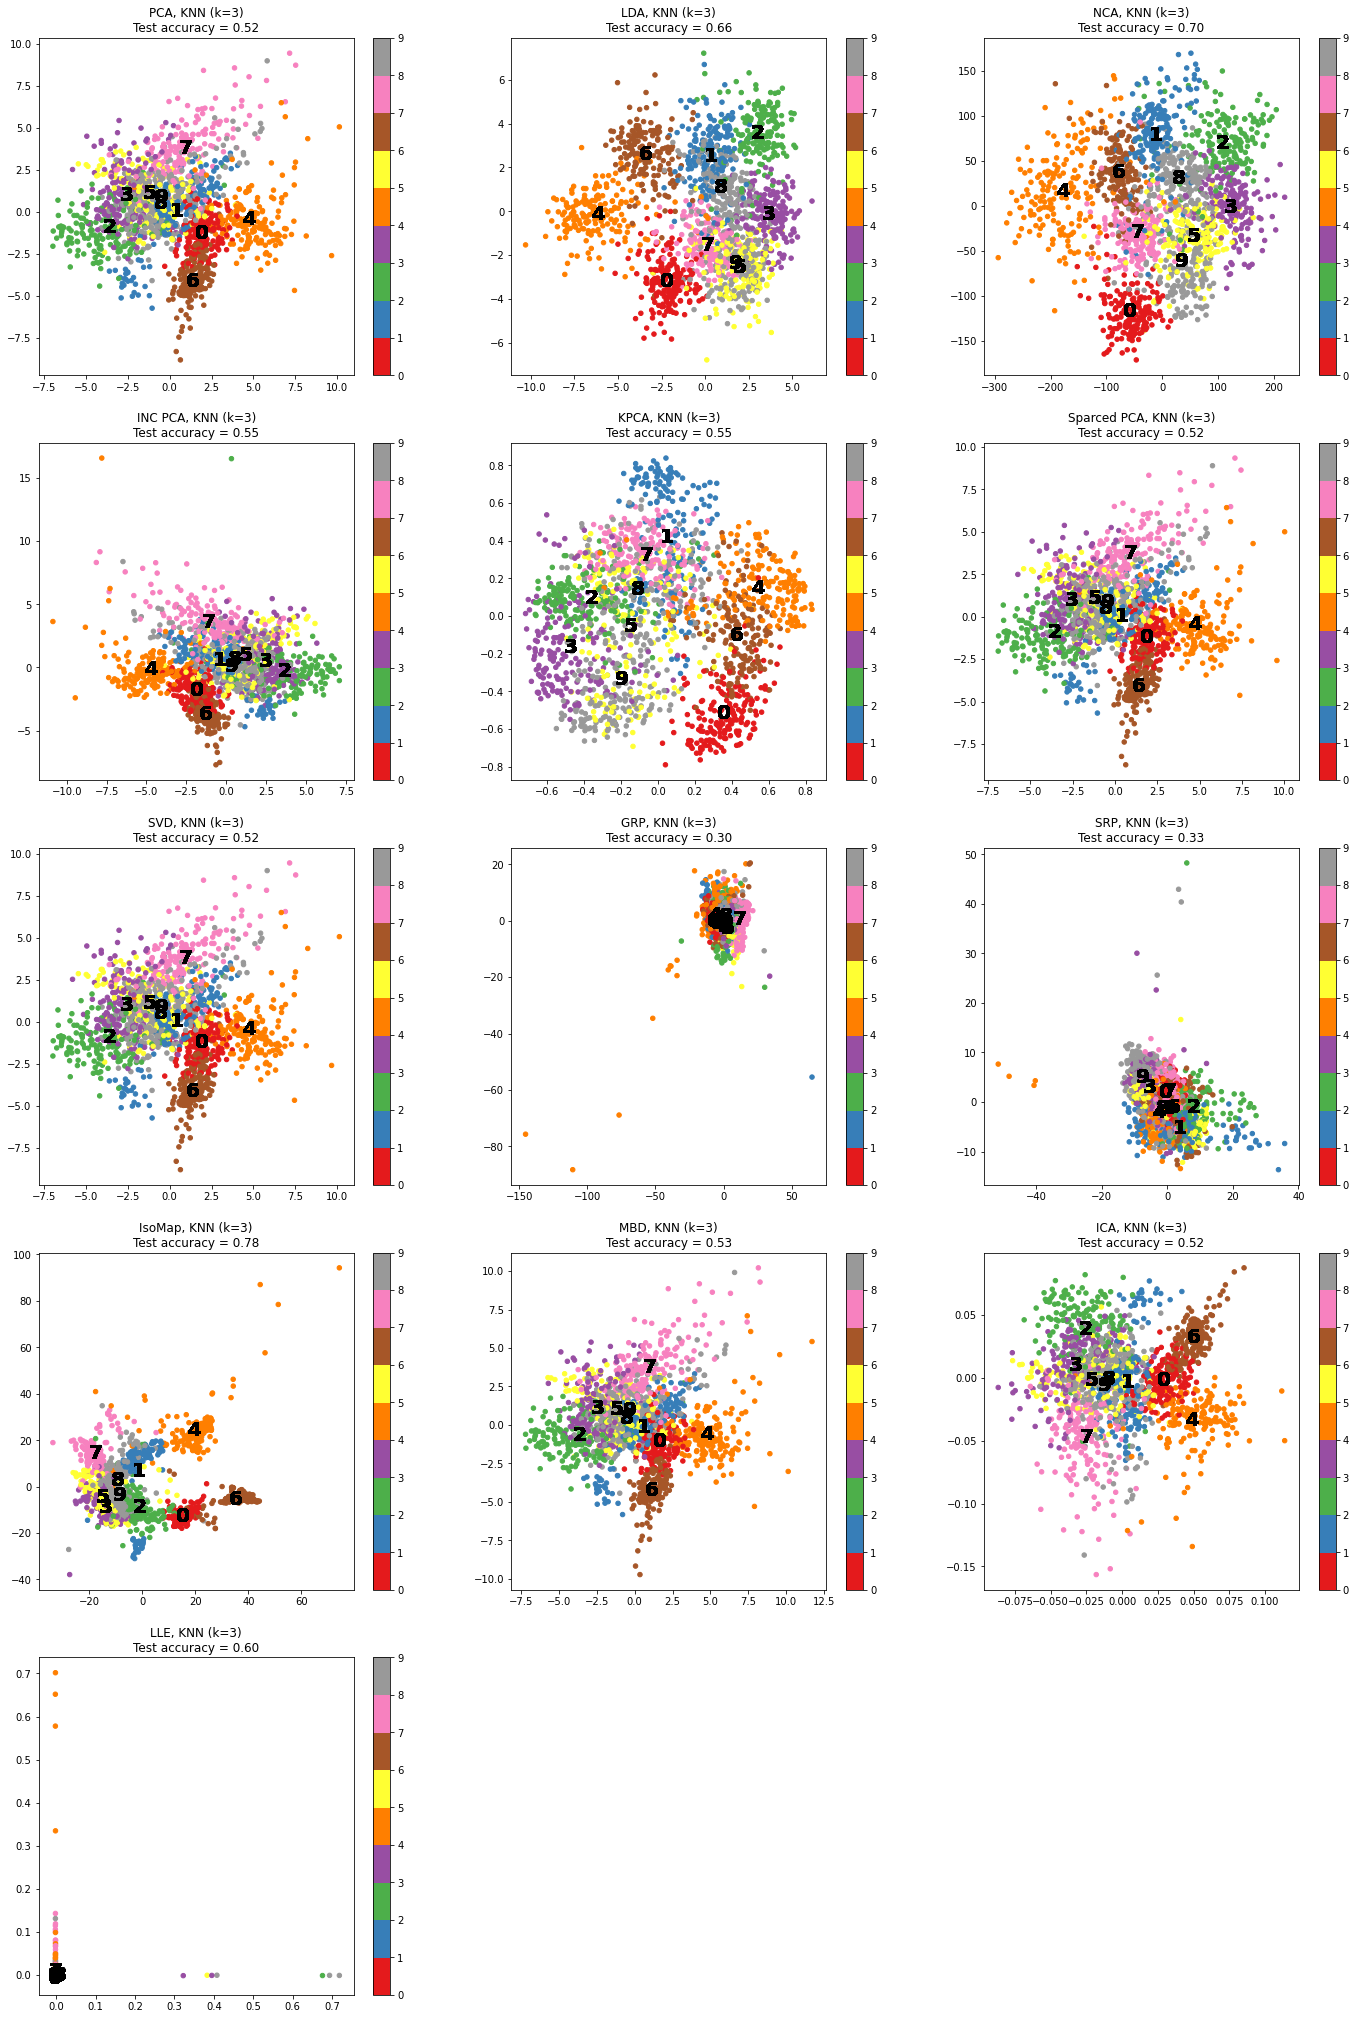

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Make a list of the methods to be compared
dim_reduction_methods = {'PCA': pca,
                         'LDA': lda,
                         'NCA': nca,
                         'INC PCA': inc_pca,
                         'KPCA':kpca,
                         'Sparced PCA': sparsepca,
                         'SVD': SVD,
                         'GRP' : GRP,
                         'SRP': SRP,
                         'IsoMap': isomap,
                         'MBD': miniBatchDictLearning,
                         'ICA': FastICA,
                         'LLE': lle}


plt.figure(figsize=(24, 36))

for j,(name, model) in enumerate(dim_reduction_methods.items()):
    plt.subplot(5, 3, j + 1, aspect='auto')

    # Fit the method's model
    model.fit(X_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(model.transform(X_train), y_train)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(model.transform(X_test), y_test)

    # Fit the methons using the fitted model
    X_embedded = model.transform(X)

    # Creating a dataframe to easily plot the sample label
    df = pd.DataFrame(np.concatenate((X_embedded, np.reshape(y, (-1, 1))), axis=1))

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=20, cmap='Set1')
    plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format(name,
                                                              n_neighbors,
                                                              acc_knn))
    plt.colorbar()

    # Label the data distributions
    for i, number in enumerate(y_test):
        plt.annotate(number,
                     df.loc[df[2]==number,[0,1]].mean(),
                     horizontalalignment='center',
                     verticalalignment='center',
                     weight='bold',
                     size='20')

plt.show()

# Observations
We can observe how different dimensionality reduction techniques produce different results.